# Customer Segmentation
Customer Segmentation is one of the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base.
![picture](https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/R-project-customer-segmentation-768x402.png)


> We are given a  dataset from a supermarket mall and through membership cards, we have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

> The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and separate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.


## **Import Library and Dataset**

In [1]:
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns   
sns.set(color_codes = True)        

#get rid of future warnings with seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Upload the Dataset File
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Loading the dataset into the Data-Frame
import io 
data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

## Understanding the Dataset

In [4]:
# Number of rows & columns of the dataset
data.shape

(200, 5)

In [5]:
# Data types of all the feature columns
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Number of Null values in the data:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# The first 10 rows of the data
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#Summary of Statistics of the data(mean, min, std, etc.)
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


> ## **Observation**
*   There are total 200 different data with 5 different feature columns
*   All feature columns are in intergers except 'Gender' which is of string data type. 
*   No null values is there in any rows
*   No missing values
*   All other columns has clean data

---



---



---




# Cleaning the Dataset

> We can drop the 'CustomerID' column which represent the ID of each customer. It doesn't make any sense in segmenting the customers as different customers have different IDs. 

In [9]:
data.drop(["CustomerID"], axis = 1, inplace=True)

# Exploratory Data Analysis
Exploratory Data Analysis (EDA for short) is an important aspect to analyze any datasets. It is generally used to insight datasets by visual representation and most importantly looking for patterns and relations within feature columns of the dataset.

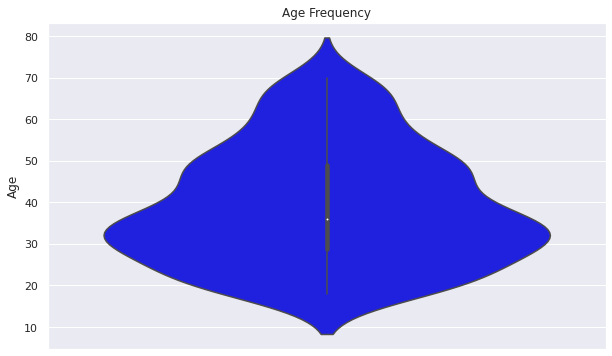

In [10]:
# Visualize the distribution of age on the basis of frequency
plt.figure(figsize=(10,6))
plt.title("Age Frequency",)
sns.axes_style("dark")
sns.violinplot(y=data["Age"], color="Blue")
plt.show()

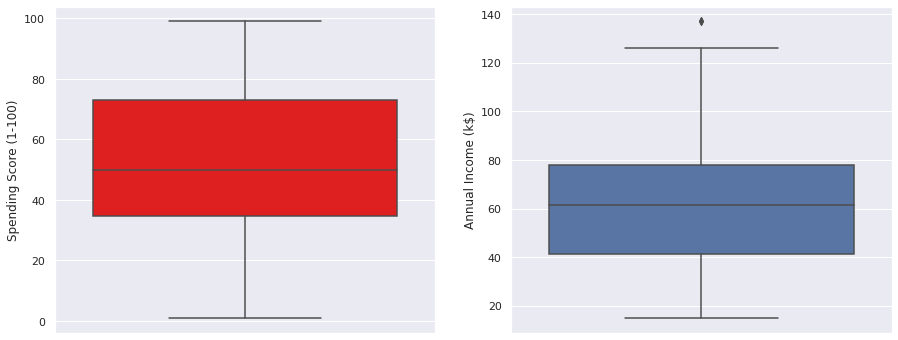

In [11]:
# Visualise the distribution range of Spending Score and Annual Income
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])
plt.show()

> **Observation**: The range of 'Spending Score' is more than the 'Annual Income' range.

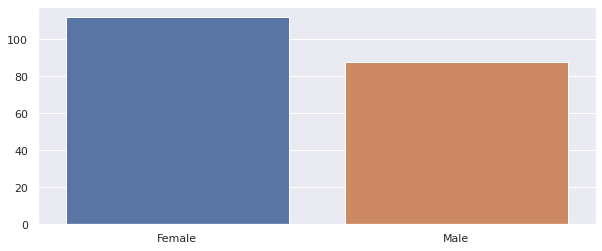

In [12]:
# Visualise the distribution of male and female population in the dataset
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

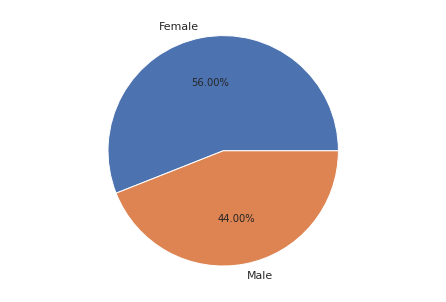

In [13]:
# Pie chart represention of 'Gender' feature column
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['Female','Male']
ax.pie(data['Gender'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

> **Observation**: The percentage of female customers is 56%, whereas the percentage of male is 44% in the dataset.

## Variance of Numerical feature Columns
**These are:**
*   Age
*   Annual Income
*   Spending Scores

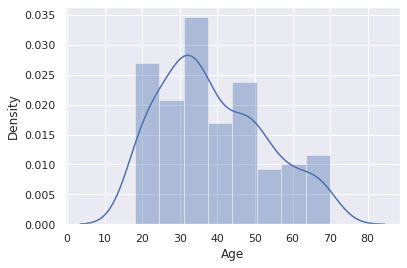

In [14]:
#Plotting variance of age
sns.distplot(data["Age"])
plt.show()

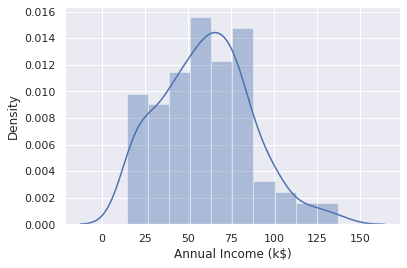

In [15]:
#Plotting variance of Annual Income
sns.distplot(data["Annual Income (k$)"])
plt.show()

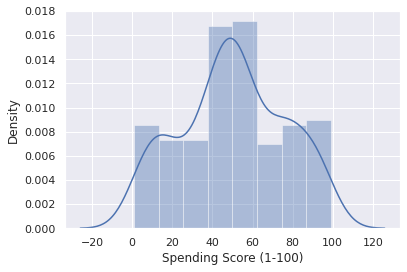

In [16]:
#Plotting variance of Spending score
sns.distplot(data["Spending Score (1-100)"])
plt.show()

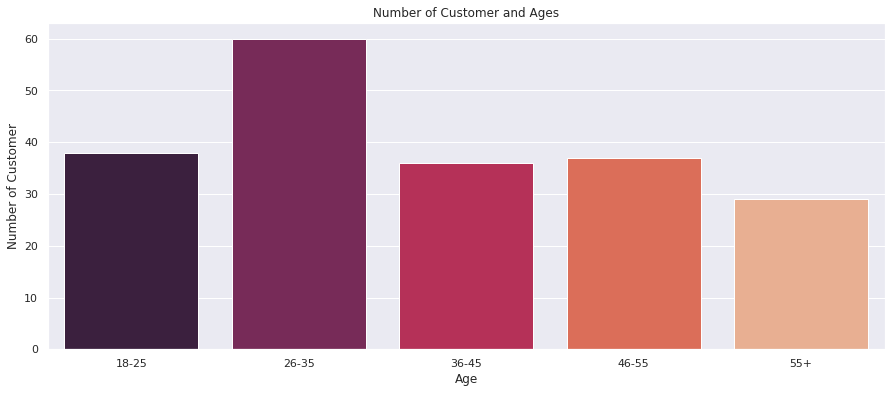

In [17]:
# Visualize the customers in different age groups 
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


> **Observation**: The distribution of number of customers in different age groups shows that the 26-35 age group outweighs every other age group.

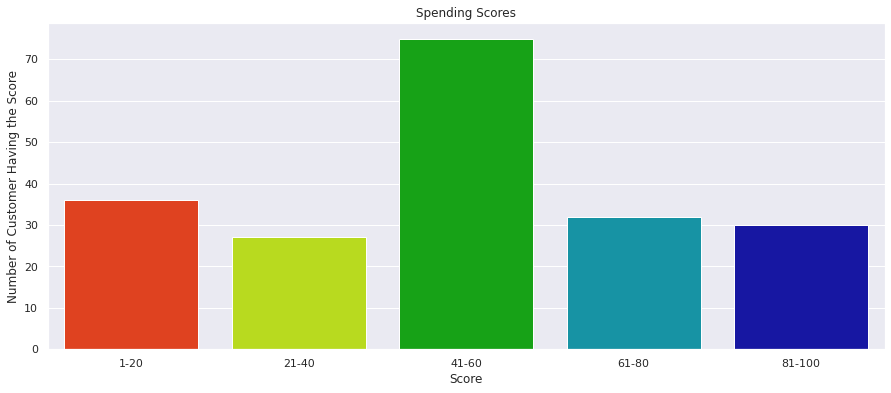

In [18]:
# Visualize the distribution of customers on the basis of their spending scores
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

> **Observation:** The majority of the customers have their spending score in the range 41-60.

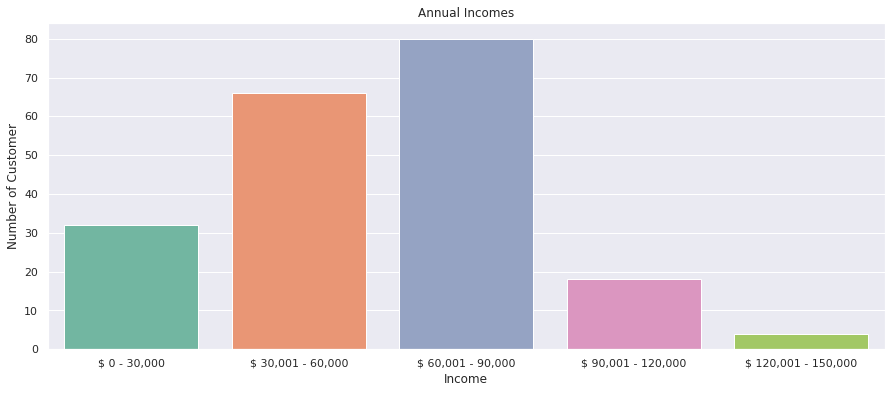

In [19]:
# Visualize the distribution of customers on the basis of their annual incomes
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

> **Observation**:  The majority of the customers have annual income in the range 60000 and 90000.

# Label Encoding 
> The 'Gender' column is of categorical type. We can't use this column for predicting customer segmentation as it's data type is string. But it's also a factor that shows the customer behaviour. Hence, we convert the values of the 'Gender' in numerical form.

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_data = LabelEncoder()
data["Gender"] = labelencoder_data.fit_transform(data["Gender"])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


> **Observation**: Now after label encoding, the male value is labeled by **1**, whereas the female value is labeled as **0**.

# K-means clustering Algorithm
K-means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.</br>
It is a centroid-based algorithm, or a distance based algorithm, where we calculate the distances to assign a point to a cluster.

## Determining Optimal Clusters: Elbow method
In K-means algorithm,we first need to specify the number of clusters to use. But we need optimal number of clusters. So, we can use **Elbow Method** to determine the optimal clusters.
In this method, there is a term called **Within Cluster Sum Of Squares (WCSS)** is used to figure out the optimal number of clusters value.

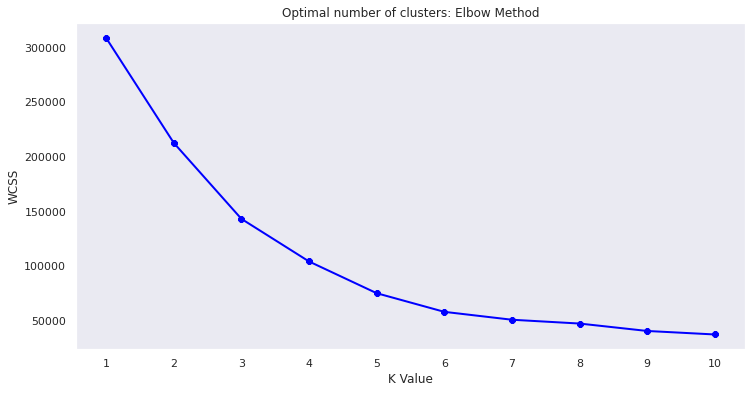

In [21]:
# Visualize the optimal number of clusters by Elbow method 
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.title("Optimal number of clusters: Elbow Method")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

> Observation: From the above graph, we can conclude that 5 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

# Visualize the Clustering Results

## Visualize the result in **3-D** view

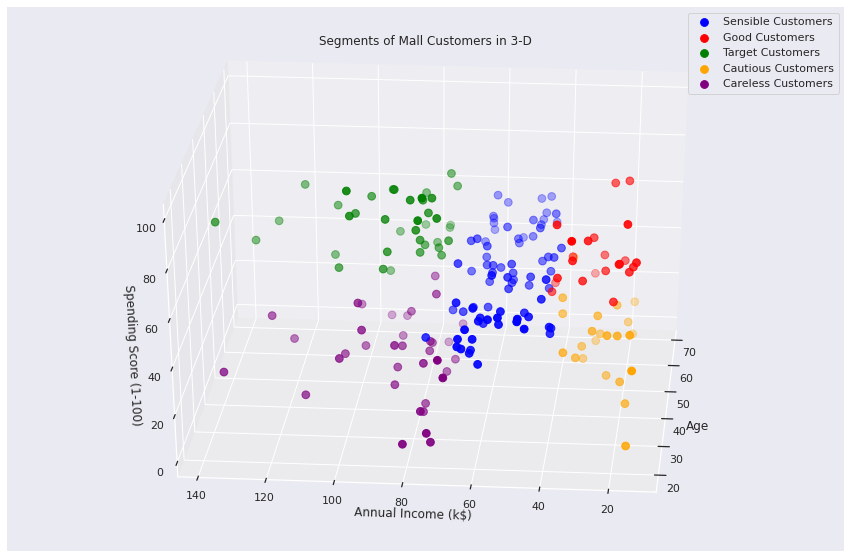

In [22]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60, label = 'Sensible Customers')
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60, label = 'Good Customers')
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60, label = 'Target Customers')
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60, label = 'Cautious Customers')
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60, label = 'Careless Customers')
ax.view_init(30, 185)
plt.title("Segments of Mall Customers in 3-D")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Visualize the result in **2-D** view

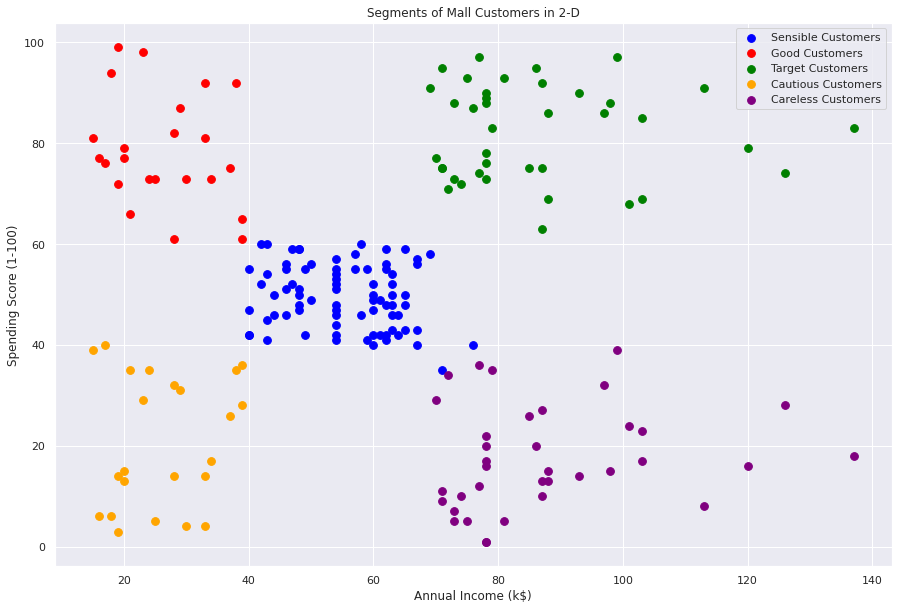

In [23]:
plt.figure(figsize=(15,10))   
plt.scatter(data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60, label = 'Sensible Customers')
plt.scatter(data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60, label = 'Good Customers')
plt.scatter(data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60, label = 'Target Customers')
plt.scatter(data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60, label = 'Cautious Customers')
plt.scatter(data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60, label = 'Careless Customers')
plt.title("Segments of Mall Customers in 2-D")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

> **Observation**: 
After plotting the results obtained by K-means on this 3D graphic, it's our job now to identify and describe the five clusters that have been created:
1. Sensible customers: The blue cluster groups young people with moderate to low annual income who actually spend a lot.
2. Good customers: The red cluster groups reasonably young people with pretty decent salaries who spend a lot.
3. Target customers: The green cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.
4. Cautious customers: The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.
5. Careless customers: The purple cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.

# Conclusion
After developing a solution for this problem, we have come to the following conclusions:
* KMeans Clustering is a powerful technique in order to achieve a decent customer segmentation.
* Customer segmentation is a good way to understand the behaviour of different customers and plan a good marketing strategy accordingly.
* There isn't much difference between the spending score of women and men, which leads us to think that our behaviour when it comes to shopping is pretty similar.
* Observing the clustering graphic, it can be clearly observed that the ones who spend more money in malls are young people. That is to say they are the main target when it comes to marketing, so doing deeper studies about what they are interested in may lead to higher profits.
* Althought younglings seem to be the ones spending the most, we can't forget there are more people we have to consider, like people who belong to the pink cluster, they are what we would commonly name after "middle class" and it seems to be the biggest cluster.
* Promoting discounts on some shops can be something of interest to those who don't actually spend a lot and they may end up spending more.


